In [21]:
# 对于SVM，存在一个分类面，两个点集到此平面的最小距离最大，两个点集中的边缘点到此平面的距离最大。

import numpy as np
from matplotlib import colors
from sklearn import svm 
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl



In [22]:
# *************将字符串转为整型，便于数据加载***********************



# 加载数据
data_path = '../dataset/train2/train2.txt'  # 数据文件的路径
data = np.loadtxt(data_path,  # 数据文件路径
                  dtype=float,  # 数据类型
                  delimiter=','  # 数据分隔符
                #   converters={2: rock_type}
                  )  # 将第5列使用函数iris_type进行转换
# print(data)                                                 #data为二维数组，data.shape=(150, 5)
# print(data.shape)
# 数据分割
x, y = np.split(data,  # 要切分的数组
                (6,),  # 沿轴切分的位置，第7列开始往后为y
                axis=1)  # 1代表纵向分割，按列分割

x = x[:, 4:6]
# 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
# 在X中我们取前两列作为特征，为了后面的可视化，原始的四维不好画图。x[:,0:4]代表第一维(行)全取，第二维(列)取0~2
# print(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,  # 所要划分的样本特征集
    y,  # 所要划分的样本结果
    random_state=1,  # 随机数种子确保产生的随机数组相同
    test_size=0.3)  # 测试样本占比
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(5441, 2)
(5441, 1)
(2333, 2)
(2333, 1)


In [23]:
# create model
# **********************SVM分类器构建*************************
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,  # 误差项惩罚系数,默认值是1
                  kernel='rbf',  # 线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr')  # 决策函数
    return clf


# 2.定义模型：SVM模型定义
clf = classifier()


In [24]:
y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
print(x_train.ravel())

[0.24993459 0.24993459 0.15765987 ... 0.17086389 0.12516635 0.12516635]


In [25]:
# 模型训练

# y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
# ***********************训练模型*****************************


def train(clf, x_train, y_train):
    clf.fit(x_train,  # 训练集特征向量，fit表示输入数据开始拟合
            y_train.ravel())  # 训练集目标值 ravel()扁平化，将原来的二维数组转换为一维数组


# 3.训练SVM模型
train(clf, x_train, y_train)


In [26]:
# **************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    # 分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' % (clf.score(x_train, y_train)))
    print('test data prediction:%.3f' % (clf.score(x_test, y_test)))
    # 原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    # 计算决策函数的值，表示x到各分割平面的距离,3类，所以有3个决策函数，不同的多类情况有不同的决策函数？
    print('decision_function:\n', clf.decision_function(x_train))


# 4.模型评估
print_accuracy(clf, x_train, y_train, x_test, y_test)


trianing prediction:0.373
test data prediction:0.352
traing data Accuracy:0.373
testing data Accuracy:0.352
decision_function:
 [[11.30691823  5.74972591  1.72242811 ...  2.70532847  1.69491085
   9.30147371]
 [ 5.81136594 11.31352108  8.29332734 ... -0.31449006 10.31345896
   6.2117282 ]
 [10.30671811  8.30873181  0.68696943 ...  4.70993014  0.68193527
   9.29759208]
 ...
 [ 9.30113185  6.24618174  3.81323512 ...  6.17749788  1.69353981
  11.30718889]
 [ 9.28955594  7.2927548   7.26591561 ...  2.71037406  3.82189536
  11.30925621]
 [ 1.68927566  2.69071823  9.30073973 ... 11.31307611  6.26842127
   0.67993366]]


In [27]:
print(x[:, 0])
print(x_test.shape)

[0.15510547 0.15535359 0.13009824 ... 0.17196682 0.25903486 0.22027179]
(2333, 2)


In [28]:
# 取样，取10%，不然数据太多了看不清
# https://blog.csdn.net/weixin_42201701/article/details/86655721

# x_random =[]
# for i in range(0,300):
#        x_random.append(np.random.choice(x.shape[0],1))
# x_random = x.copy()
# np.random.shuffle(x_random)
# x_plot = x_random[:300, :]

# x_test_random = x.copy()
# np.random.shuffle(x_test_random)
# x_test_plot = x_test_random[:300, :]

# y_random = y.copy()
# np.random.shuffle(y_random)
# y_plot = y_random[:300, :]
# x_test_random = np.random.choice(x.shape[0],300)
# y_random = np.random.choice(x.shape[0],300)

# x_plot = x[row_rand_array1[0:300]]

# row_rand_array = np.arange(x_test.shape[0])

# np.random.choice(row_rand_array)

# x_test_plot = x_test[row_rand_array[0:300]]

# y_plot = np.random.choice(y.flatten(), size=300)

nums1=3000
nums2=1000

total_x=np.hstack((x,y))
total_x_test=np.hstack((x_test,y_test))


x_random = total_x.copy()
np.random.shuffle(x_random)
x_plot = x_random[:nums1, :2]
y_plot = x_random[:nums1, 2:3]

x_test_random = total_x_test.copy()
np.random.shuffle(x_test_random)
x_test_plot = x_test_random[:nums2, :2]
y_test_plot= x_test_random[:nums2, 2:3]

print(total_x.shape)
print(total_x_test.shape)
print(x_plot.shape)
print(y_plot.shape)
print(x_test_plot.shape)
print(y_test_plot.shape)
# print(y_plot)



(7774, 3)
(2333, 3)
(3000, 2)
(3000, 1)
(1000, 2)
(1000, 1)


grid_test:
 [[0.07180821 0.06021547]
 [0.07180821 0.06146634]
 [0.07180821 0.06271722]
 ...
 [0.29754728 0.30663827]
 [0.29754728 0.30788915]
 [0.29754728 0.30914003]]
(40000, 2)
the distance to decision plane:
 [[ 9.25141681  2.80584748  2.96376826 ...  3.74620418  0.69564325
   4.75845927]
 [ 9.25065769  2.80063259  2.9885782  ...  3.74572327  0.69535942
   4.75749642]
 [ 9.24985015  2.7955561   3.0178808  ...  3.74534887  0.69507405
   4.75651053]
 ...
 [10.27840537  3.85600266  2.80375673 ...  2.78617512  1.700508
   5.74002344]
 [10.27772182  3.85925214  2.80513171 ...  2.78710428  1.70056934
   5.74115991]
 [10.27704473  3.86253231  2.80651231 ...  2.78802845  1.70063017
   5.74231413]]
grid_hat:
 [5. 5. 5. ... 5. 5. 5.]


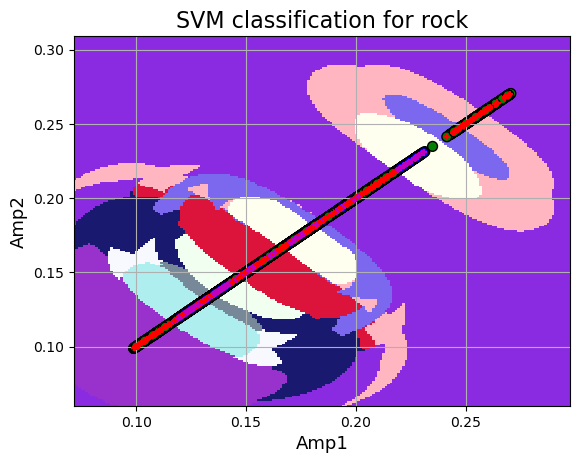

In [29]:
# 可视化及使用
# 所有数据
def draw(clf, x):
    # 标记特征值
    iris_feature = u'Amp1', u'Amp2',u'mean',u'range'
    # 开始画图
    x1_min, x1_max = x[:, 0].min()-(x[:, 0].max())/10, x[:, 0].max()+ (x[:, 0].max())/10 # 第0列的范围
    x2_min, x2_max = x[:, 1].min()-abs((x[:, 1].max())/7), x[:, 1].max()+abs((x[:, 1].max())/7)  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#FFB6C1', '#DC143C', '#FFF0F5','#9932CC', '#8A2BE2', '#7B68EE','#F8F8FF', '#191970', '#778899','#AFEEEE', '#F0FFF0', '#FFFFF0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b'])
    cm_test = mpl.colors.ListedColormap(['r', 'm'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据
    
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(
        y), edgecolor='k', s=50, cmap=cm_dark)  # 样本点
    # plt.scatter(x_test[:, 0], x_test[:, 1], s=1,
    #             facecolor='red', zorder=10, marker='+')       # 测试点
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.squeeze(
        y_test), marker='+', zorder=10, s=20, cmap=cm_test)       # 测试点
  
    # 设置坐标标签及字体大小
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)


grid_test:
 [[0.07180821 0.06021547]
 [0.07180821 0.06146634]
 [0.07180821 0.06271722]
 ...
 [0.29754728 0.30663827]
 [0.29754728 0.30788915]
 [0.29754728 0.30914003]]
(40000, 2)
the distance to decision plane:
 [[ 9.25141681  2.80584748  2.96376826 ...  3.74620418  0.69564325
   4.75845927]
 [ 9.25065769  2.80063259  2.9885782  ...  3.74572327  0.69535942
   4.75749642]
 [ 9.24985015  2.7955561   3.0178808  ...  3.74534887  0.69507405
   4.75651053]
 ...
 [10.27840537  3.85600266  2.80375673 ...  2.78617512  1.700508
   5.74002344]
 [10.27772182  3.85925214  2.80513171 ...  2.78710428  1.70056934
   5.74115991]
 [10.27704473  3.86253231  2.80651231 ...  2.78802845  1.70063017
   5.74231413]]
grid_hat:
 [5. 5. 5. ... 5. 5. 5.]


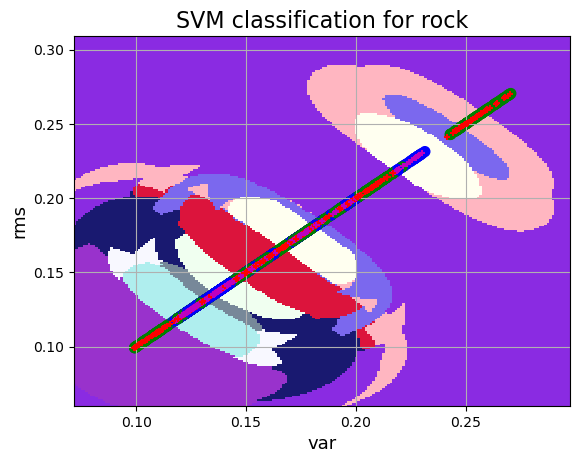

In [30]:
# 可视化及使用
# 10%数据
def draw(clf, x):
    # 标记特征值
    feature = u'Amp1', u'Amp2', u'mean', u'range', u'var', u'rms'
    # 开始画图
    x1_min, x1_max = x[:, 0].min()-(x[:, 0].max()) / \
        10, x[:, 0].max() + (x[:, 0].max())/10  # 第0列的范围
    x2_min, x2_max = x[:, 1].min()-abs((x[:, 1].max())/7), x[:,
                                                             1].max()+abs((x[:, 1].max())/7)  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#FFB6C1', '#DC143C', '#FFF0F5','#9932CC', '#8A2BE2', '#7B68EE','#F8F8FF', '#191970', '#778899','#AFEEEE', '#F0FFF0', '#FFFFF0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b'])
    cm_test = mpl.colors.ListedColormap(['r', 'm'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据

    # 取样，取10%，不然数据太多了看不清

    # print(y_plot)
    # edgecolor='k'
    plt.scatter(x_plot[:, 0], x_plot[:, 1], c=np.squeeze(
        y_plot), s=50, cmap=cm_dark)  # 样本点
    # plt.scatter(x_test_plot[:, 0], x_test_plot[:, 1], s=20,
    #             facecolor='red', zorder=10, marker='+')       # 测试点
    plt.scatter(x_test_plot[:, 0], x_test_plot[:, 1], c=np.squeeze(
        y_test_plot), marker='+', zorder=10, s=20, cmap=cm_test)       # 测试点
    # ,facecolor='red'
    # 设置坐标标签及字体大小
    plt.xlabel(feature[4], fontsize=13)
    plt.ylabel(feature[5], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)
